* Загрузите датасет с Kaggle : **https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data?select=loan_data.csv**

* Посмотрите описание данных. Сконструируйте содержательно **интерпретируемую модель** для предсказания бинарной переменной **loan_status** по значениям двух или более интервальных и двух или более категориальных переменных. 

* Загрузите необходимые библиотеки. Для подгонки логистической регрессии используйте библиотеку **statsmodels** (необходимо использовать **patsy** ЛИБО добавлять константу вручную, sm.add_constant(X)). Patsy превратит категориальные предикторы в набор dummies, если в формуле указать C(предиктор), как-то так.

* Делить датафрейм на обучающую и тестовую выборки не обязательно (но крайне желательно), но в этом случае проверять качество предсказания следует на матрице X; для простых линейных моделей это допустимо.

* Интерпретируйте результаты

При возникновении технических проблем есть, конечно, Google и Edge (легче найти релевантный совет, если указать функцию, вызвавшую ошибку, и скопировать/поместить текст сообщения об ошибки). Но я также у аппарата

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 
import matplotlib.pyplot as plt
import patsy

In [2]:
# Доступ к файлу удалось получить предварительно скачав его на ПК
file = '/Users/Administrator/Documents/Finale Files/loan_data.csv'
df = pd.read_csv(file)

In [3]:
# Проверка миссингов (отсутствуют)
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [4]:
# Построение модели регрессии
formula = 'loan_status ~ loan_amnt + person_income + credit_score + C(person_home_ownership) + C(loan_intent) + C(person_education)'
y, X = patsy.dmatrices(formula, df, return_type='dataframe')
X.head(3)

,Intercept,C(person_home_ownership)[T.OTHER],C(person_home_ownership)[T.OWN],C(person_home_ownership)[T.RENT],C(loan_intent)[T.EDUCATION],C(loan_intent)[T.HOMEIMPROVEMENT],C(loan_intent)[T.MEDICAL],C(loan_intent)[T.PERSONAL],C(loan_intent)[T.VENTURE],C(person_education)[T.Bachelor],C(person_education)[T.Doctorate],C(person_education)[T.High School],C(person_education)[T.Master],loan_amnt,person_income,credit_score
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,35000.0,71948.0,561.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1000.0,12282.0,504.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5500.0,12438.0,635.0


In [5]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=400)

In [6]:
# Построение модели логистической регрессии
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.435496
         Iterations 7


In [7]:
# Итоговая таблица для обучающей выборки
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                31500
Model:                          Logit   Df Residuals:                    31484
Method:                           MLE   Df Model:                           15
Date:                Mon, 07 Apr 2025   Pseudo R-squ.:                  0.1779
Time:                        17:58:57   Log-Likelihood:                -13718.
converged:                       True   LL-Null:                       -16686.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.9040      0.200     -4.528      0.000      -1.295      -0.513
C(person_home_ownership)[T.OTHER]      1.3662      0.256      5.336      0.000       0.864       1.868
C(person_home_ownership)[T.OWN]       -0.7979      0.093     -8.598      0.000      -0.980      -0.616
C(person_home_ownership)[T.RENT]       1.0915      0.036     30.175      0.000       1.021       1.162
C(loan_intent)[T.EDUCATION]           -0.8728      0.050    -17.553      0.000      -0.970      -0.775
C(loan_intent)[T.HOMEIMPROVEMENT]      0.0011      0.056      0.021      0.984      -0.108       0.111
C(loan_intent)[T.MEDICAL]             -0.2869      0.047     -6.144      0.000      -0.378      -0.195
C(loan_intent)[T.PERSONAL]            -0.5678      0.051    -11.236      0.000      -0.667      -0.469
C(loan_intent)[T.VENTURE]             -1.0287      0.054    -19.105      0.000      -1.134      -0.923
C(person_education)[T.Bachelor]        0.0063      0.040      0.159      0.874      -0.072       0.085
C(person_education)[T.Doctorate]       0.2431      0.129      1.885      0.059      -0.010       0.496
C(person_education)[T.High School]     0.0032      0.041      0.077      0.939      -0.078       0.084
C(person_education)[T.Master]          0.0117      0.048      0.243      0.808      -0.083       0.106
loan_amnt                              0.0001   2.83e-06     43.386      0.000       0.000       0.000
person_income                      -2.537e-05    6.3e-07    -40.255      0.000   -2.66e-05   -2.41e-05
credit_score                       -2.113e-05      0.000     -0.070      0.944      -0.001       0.001
======================================================================================================
"""

In [8]:
# "Экспериментальная форма" итоговой таблицы для обучающей выборки
log_reg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
===================================================================================
Model:                    Logit                  Method:                 MLE       
Dependent Variable:       loan_status            Pseudo R-squared:       0.178     
Date:                     2025-04-07 17:58       AIC:                    27468.2678
No. Observations:         31500                  BIC:                    27601.9917
Df Model:                 15                     Log-Likelihood:         -13718.   
Df Residuals:             31484                  LL-Null:                -16686.   
Converged:                1.0000                 LLR p-value:            0.0000    
No. Iterations:           7.0000                 Scale:                  1.0000    
-----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------
Intercept                          -0.9040   0.1996  -4.5278 0.0000 -1.2953 -0.5127
C(person_home_ownership)[T.OTHER]   1.3662   0.2560   5.3359 0.0000  0.8644  1.8680
C(person_home_ownership)[T.OWN]    -0.7979   0.0928  -8.5980 0.0000 -0.9798 -0.6160
C(person_home_ownership)[T.RENT]    1.0915   0.0362  30.1749 0.0000  1.0206  1.1624
C(loan_intent)[T.EDUCATION]        -0.8728   0.0497 -17.5528 0.0000 -0.9702 -0.7753
C(loan_intent)[T.HOMEIMPROVEMENT]   0.0011   0.0559   0.0206 0.9836 -0.1085  0.1108
C(loan_intent)[T.MEDICAL]          -0.2869   0.0467  -6.1442 0.0000 -0.3785 -0.1954
C(loan_intent)[T.PERSONAL]         -0.5678   0.0505 -11.2357 0.0000 -0.6669 -0.4688
C(loan_intent)[T.VENTURE]          -1.0287   0.0538 -19.1048 0.0000 -1.1343 -0.9232
C(person_education)[T.Bachelor]     0.0063   0.0400   0.1588 0.8738 -0.0720  0.0847
C(person_education)[T.Doctorate]    0.2431   0.1290   1.8847 0.0595 -0.0097  0.4960
C(person_education)[T.High School]  0.0032   0.0412   0.0766 0.9390 -0.0776  0.0839
C(person_education)[T.Master]       0.0117   0.0483   0.2429 0.8081 -0.0830  0.1065
loan_amnt                           0.0001   0.0000  43.3865 0.0000  0.0001  0.0001
person_income                      -0.0000   0.0000 -40.2555 0.0000 -0.0000 -0.0000
credit_score                       -0.0000   0.0003  -0.0698 0.9443 -0.0006  0.0006
===================================================================================

"""

Выводы по итоговой таблице:
1. Std.Err. практически для всех предикторов (за исключением C(person_home_ownership)[T.OTHER] и C(person_education)[T.Doctorate]) невысокая, т.е. указывает на высокую точность оценки переменных на одобрение кредита.
2. Коэф. z-статистики указывает на очень сильное влияние переменных "запрашиваемой суммы кредита", "годового дохода" и "арендаторов" на одобрение кредита.
3. p-значение указывает на статистически незначимое влияние уровня образования (бакалавр, магистр и высшая школа), кредитной истории и намерения взять займ на улучшение жилья.

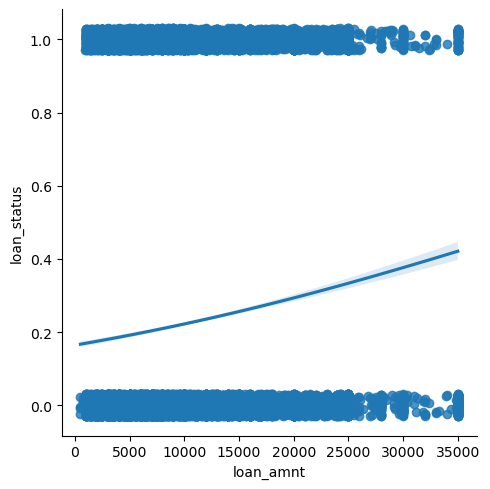

In [9]:
# Связь между интервальным предиктором loan_amnt и зависимой переменной loan_status
# С увеличением суммы займа -  вероятность одобрения займа увеличивается
# С увеличением суммы займа -  влияние других переменных увеличивается (увеличивается разброс)
dl = X_train.copy()
dl.loc[:, 'loan_status'] = y_train
sns.lmplot(x='loan_amnt', y='loan_status', data=dl, logistic=True, y_jitter=.03);

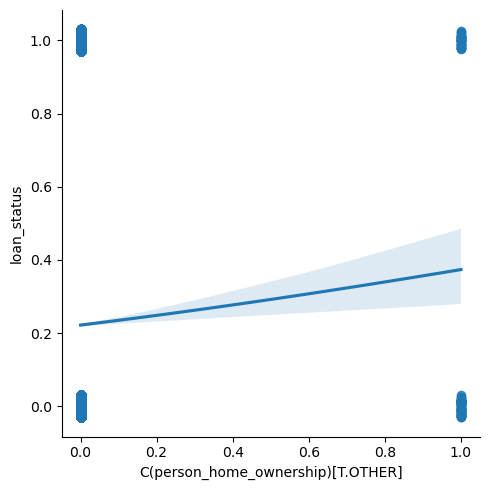

In [10]:
# Связь между категориальным предиктором C(person_home_ownership)[T.OTHER] и зависимой переменной loan_status
# С увеличением значения переменной (количества владельцев другого вида собственности жилья) -  вероятность одобрения займа увеличивается
# С увеличением значения переменной (количества владельцев другого вида собственности жилья) -  влияние других переменных увеличивается (увеличивается разброс)
sns.lmplot(x='C(person_home_ownership)[T.OTHER]', y='loan_status', data=dl, logistic=True, y_jitter=.03);

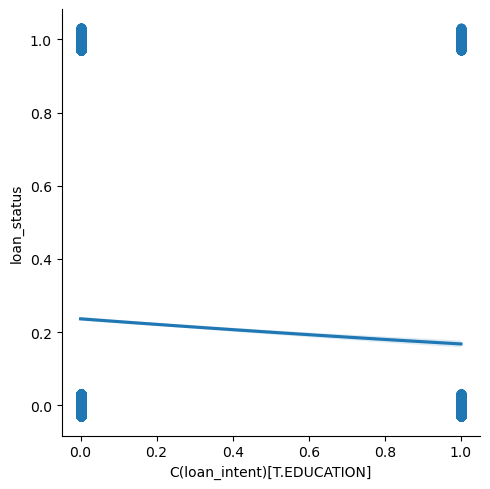

In [11]:
# Связь между категориальным предиктором C(loan_intent)[T.EDUCATION] и зависимой переменной loan_status
# С увеличением значения переменной (количество займов на образовательные цели) -  вероятность одобрения займа уменьшается
sns.lmplot(x='C(loan_intent)[T.EDUCATION]', y='loan_status', data=dl, logistic=True, y_jitter=.03);

In [12]:
# Показатели влиятельности случаев
# cooks_d ~ 0 и hat_diag (влияние наблюдения на предсказанные значения)~ 0 -> выбросы модели не имеют значительного влияния
influence = log_reg.get_influence()
summary_influence = influence.summary_frame()
summary_influence.head(3)

,dfb_Intercept,dfb_C(person_home_ownership)[T.OTHER],dfb_C(person_home_ownership)[T.OWN],dfb_C(person_home_ownership)[T.RENT],dfb_C(loan_intent)[T.EDUCATION],dfb_C(loan_intent)[T.HOMEIMPROVEMENT],dfb_C(loan_intent)[T.MEDICAL],dfb_C(loan_intent)[T.PERSONAL],dfb_C(loan_intent)[T.VENTURE],dfb_C(person_education)[T.Bachelor],dfb_C(person_education)[T.Doctorate],dfb_C(person_education)[T.High School],dfb_C(person_education)[T.Master],dfb_loan_amnt,dfb_person_income,dfb_credit_score,cooks_d,standard_resid,hat_diag,dffits_internal
32393,0.000548,0.000003,-0.003530,0.000074,0.000109,0.000245,0.000119,-0.001056,0.000206,0.000038,0.000064,-0.000936,0.000087,0.000777,-0.000493,-0.000531,0.000001,-0.211462,0.000404,-0.004254
27151,0.000446,0.000129,0.000621,-0.000469,-0.000116,-0.000324,0.000072,-0.000067,-0.006046,-0.003412,0.000112,-0.000037,0.000036,0.002766,0.000609,-0.000716,0.000006,-0.477950,0.000413,-0.009710
203,0.000781,0.000057,-0.000307,0.007204,-0.000969,0.000180,-0.000162,-0.000533,0.013486,0.000131,0.000368,0.008910,0.000457,0.016181,-0.003681,-0.003861,0.000050,0.908965,0.000973,0.028369


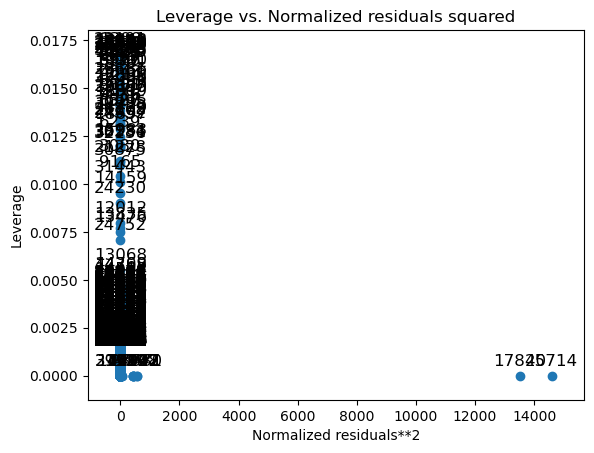

In [13]:
# Показатель влиятельности случаев leverage указывает на 2 значительных выброса из 31500 значений обучающей выборки.
sm.graphics.plot_leverage_resid2(log_reg);

In [15]:
# Предсказания с указанным порогом вероятности принадлежности к классу
# Для наблюдений № 1369 и 5022 модель предсказывает вероятность принадлежности к классу 1 (одобрение кредита) равную 0.26 и 0.35, что меньше 0.5.
# Предсказанные классы показывают, что для этих наблюдений модель предсказала класс 0 - т.е. кредит не будет одобрен.
y_pred_prob = log_reg.predict(X_test)
print(y_pred_prob.head(2), '\n')
y_pred = (y_pred_prob > 0.5).astype(int)
print(y_pred.head(2))

1369    0.260695
5022    0.353843
dtype: float64 

1369    0
5022    0
dtype: int32


Confusion Matrix : 
 [[10232   268]
 [ 2110   890]]

Test accuracy =  0.8238518518518518

Balanced test accuracy =  0.6355714285714286 



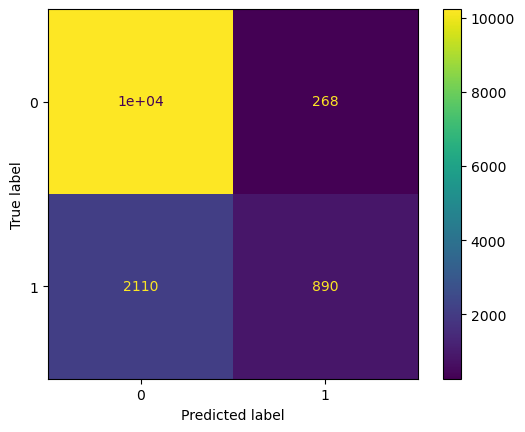

In [16]:
# Матрица "неточностей"
# 10232 кредитов не одобрены
# 268 кредитов были ошибочно одобрены
# 2110 кредитов не были одобрены, хотя должны были быть одобрены
# 890 кредитов одобрены
# Точность модели - высокая (82,39%)
# Скорректированная точность - 63.56%, т.е. модель предсказывает классы примерно одинаково 
cm = metrics.confusion_matrix(y_test, y_pred)  
print("Confusion Matrix : \n", cm)  
metrics.ConfusionMatrixDisplay(cm).plot();
print('\nTest accuracy = ', metrics.accuracy_score(y_test, y_pred))
print('\nBalanced test accuracy = ', metrics.balanced_accuracy_score(y_test, y_pred), '\n')

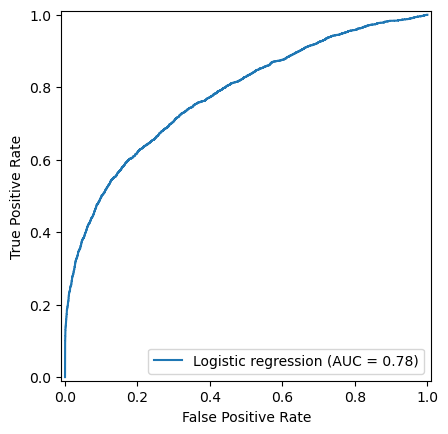

In [17]:
# Построение ROC-кривой
# При AUC = 0.78 - модель имеет хорошую предсказательную способность
fpr, tpr, _ = metrics.roc_curve(y_test, log_reg.predict(sm.add_constant(X_test)))
roc_auc = metrics.auc(fpr, tpr)
disp = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic regression');
disp.plot();